In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
pd.options.display.float_format = "{:.3f}".format
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgelsd")

In [35]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
df = pd.read_csv(data_path, header=4)

In [36]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [37]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [38]:
def murder(c):
    if c["Murder and\nnonnegligent\nmanslaughter"] > 0:
        return 1
    elif c["Murder and\nnonnegligent\nmanslaughter"] == 0:
        return 0
    

In [39]:
df["murder"] = df.apply(murder, axis=1)

In [40]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [41]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [46]:
df["Population"].head()

0     1,861
1     2,577
2     2,846
3    97,956
4     6,388
Name: Population, dtype: object

In [53]:
df["Population"] = df["Population"].str.replace(",", "")

In [54]:
s = "1,861"
s = s.replace(",", "")
print(s)

1861


In [55]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861,0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,2577,3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,2846,3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,97956,791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,6388,23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [57]:
df["Population"] = pd.to_numeric(df["Population"])

In [64]:
df["Robbery"] = df["Robbery"].str.replace(",", "")

In [65]:
df["Robbery"] = pd.to_numeric(df["Robbery"])

In [66]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
Pop_Squared                               float64
dtype: object

In [67]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2,10,0,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3,20,1,0.000,0.000,6640929.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1,15,0,0.000,0.000,8099716.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53,165,5,nan,0.000,40806544.000


In [68]:
df["Pop_Squared"] = df["Population"] ** 2

In [69]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2,10,0,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3,20,1,0.000,0.000,6640929.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1,15,0,0.000,0.000,8099716.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53,165,5,nan,0.000,40806544.000


In [70]:
def robbery(c):
    if c["Robbery"] > 0:
        return 1
    elif c["Robbery"] == 0:
        return 0
    
df["robbery"] = df.apply(robbery, axis=1)
    

In [71]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2,10,0,0.000,0.000,3463321.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3,20,1,0.000,0.000,6640929.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1,15,0,0.000,0.000,8099716.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53,165,5,nan,0.000,40806544.000,1.000


C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\jesst\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'whiskers': [<matplotlib.lines.Line2D at 0x2443c4e2ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x2443c4ec4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2443c4e2a58>],
 'medians': [<matplotlib.lines.Line2D at 0x2443c4ecd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x2443c4f5208>],
 'means': []}

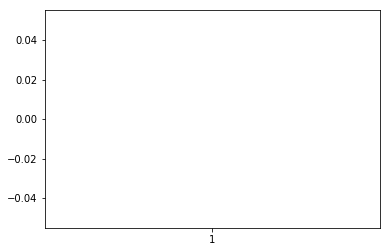

In [79]:
plt.boxplot(df["Population"])